In [60]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats.stats import pearsonr   
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data_right = pd.read_excel('analyze_data/analyze_data_right.xlsx')
data_left = pd.read_excel('analyze_data/analyze_data_left.xlsx')
data_er = pd.read_excel('analyze_data/analyze_data_er.xlsx')

In [3]:
data_left[np.abs(data_left['regionale2010 vote']-data_left['regionale2015 vote']) < 50].shape

(22814, 22)

In [4]:
def compute_correlation(data):
    columns_list = data.columns.tolist()
    cor_right_party = pd.DataFrame(columns = columns_list[2:])
    counter = 2 # because the first 3 variables in the variable list are not important 
    for col in columns_list[2:]:
        extract_data = data[[columns_list[1], columns_list[counter]]]
        extract_data = extract_data.dropna()
        cor = pearsonr(extract_data[extract_data.columns[0]], extract_data[extract_data.columns[1]])[0] * 100
        cor_right_party[col] = [cor]
        counter += 1 
    return cor_right_party

In [5]:
def create_correlation_table(right,left,er):
    correlation_right_party = compute_correlation(right) 
    correlation_left_party = compute_correlation(left)
    correlation_er_party = compute_correlation(er)
    correlation_table = pd.concat([correlation_left_party,correlation_right_party,correlation_er_party])
    correlation_table.index = ['Left','Right', 'Extreme Right']
    correlation_table = correlation_table.T
    return correlation_table

In [6]:
correlation_table = create_correlation_table(data_right,data_left,data_er)

In [7]:
correlation_table

,Left,Right,Extreme Right
regionale2004 vote,64.688660,34.614008,67.331772
regionale2010 vote,-0.076994,71.784847,71.998575
Immigrant,-12.480203,20.117342,-10.755233
Salaire,38.318189,-15.774859,-23.927632
Agriculteurs,17.898836,-3.876219,-10.988869
Artisans,-1.428497,9.725289,-8.881199
Cadres,6.420419,1.926759,-11.209943
Prof_Intermediaire,-3.340594,-1.687218,2.111625
Employes,-9.659553,-4.289384,13.264534
Ouvrier,-1.314590,-23.814793,27.399715


### We export the correlation table

In [8]:
writer = pd.ExcelWriter('result/correlation_table_regional2015.xlsx')
correlation_table.to_excel(writer,'Sheet1') 
writer.save()

### We do some data viz

In [9]:
%matplotlib inline
import seaborn as sns

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [10]:
right = data_right.copy()
left = data_left.copy()
er = data_er.copy()

In [11]:
right = right.drop(['Salaire'],axis=1)
left = left.drop('Salaire',axis=1)
er = er.drop('Salaire',axis=1)

In [12]:
right = right.apply(lambda x: x.fillna(x.mean()))
left = left.apply(lambda x: x.fillna(x.mean()))
er = er.apply(lambda x: x.fillna(x.mean()))

### We replace salary missing values by its mean

In [13]:
#right['Salaire'] = np.log(right['Salaire'])


In [14]:
#right['Salaire'].hist(bins=100)

In [15]:
#right['Salaire'].mean()

In [16]:
#right['Salaire'] = right['Salaire'].fillna(right['Salaire'].mean())

In [17]:
#right = right.apply(lambda x: x.fillna(x.mean()))

In [18]:
right.apply(lambda x: sum(x.isnull()))

Code Insee                0
regionale2015 vote        0
regionale2004 vote        0
regionale2010 vote        0
Immigrant                 0
Agriculteurs              0
Artisans                  0
Cadres                    0
Prof_Intermediaire        0
Employes                  0
Ouvrier                   0
Retraite                  0
Autre                     0
Sans diplome              0
CEP                       0
BEPC                      0
CAP-BEP                   0
BAC                       0
Enseignement_sup_court    0
Enseignement_sup_long     0
Proprietaire              0
dtype: int64

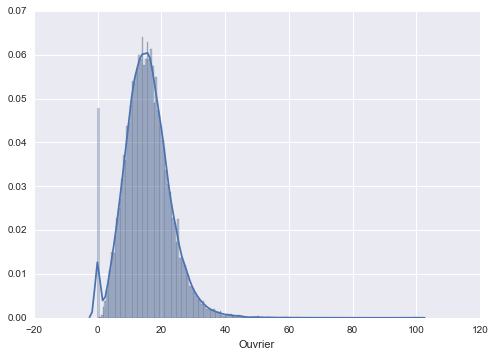

In [19]:
sns.distplot(right['Ouvrier'])

In [20]:
correlation_matrix = right[right.columns[1:]].corr()

In [21]:
correlation_matrix

,regionale2015 vote,regionale2004 vote,regionale2010 vote,Immigrant,Agriculteurs,Artisans,Cadres,Prof_Intermediaire,Employes,Ouvrier,Retraite,Autre,Sans diplome,CEP,BEPC,CAP-BEP,BAC,Enseignement_sup_court,Enseignement_sup_long,Proprietaire
regionale2015 vote,1.000000,0.346041,0.717771,0.200833,-0.038674,0.097031,0.019224,-0.016834,-0.042796,-0.237604,0.149151,0.045373,-0.087694,-0.061085,0.133771,-0.218138,0.112982,0.083933,0.189477,-0.141840
regionale2004 vote,0.346041,1.000000,0.330861,0.048435,-0.054204,0.033899,-0.048938,-0.022251,0.014900,-0.044732,0.027075,0.085147,0.091698,-0.075564,0.110934,-0.091281,0.046258,-0.039870,0.002552,-0.040704
regionale2010 vote,0.717771,0.330861,1.000000,0.090531,-0.082554,0.018876,-0.118524,-0.082223,0.023432,-0.096260,0.155424,0.060979,0.059965,0.040639,0.160756,-0.082877,0.013236,-0.083884,-0.047413,-0.115423
Immigrant,0.200833,0.048435,0.090531,1.000000,-0.050960,0.056899,0.089722,-0.039395,-0.041491,-0.138667,0.014648,0.169722,0.129523,-0.161216,0.025217,-0.262355,0.065528,-0.009803,0.223038,-0.294498
Agriculteurs,-0.038674,-0.054204,-0.082554,-0.050960,1.000000,-0.034223,-0.214766,-0.253386,-0.236801,-0.124787,0.071878,-0.166995,-0.000230,0.272759,0.011844,-0.059552,0.047993,-0.116140,-0.155271,0.139055
Artisans,0.097031,0.033899,0.018876,0.056899,-0.034223,1.000000,0.000616,-0.048977,-0.077558,-0.179128,-0.068278,-0.076702,-0.105652,-0.051413,0.043119,-0.045079,0.098651,0.043761,0.103726,0.009177
Cadres,0.019224,-0.048938,-0.118524,0.089722,-0.214766,0.000616,1.000000,0.296828,-0.040468,-0.279837,-0.309190,0.010724,-0.322794,-0.368866,-0.095046,-0.223473,0.132944,0.414183,0.629565,0.022104
Prof_Intermediaire,-0.016834,-0.022251,-0.082223,-0.039395,-0.253386,-0.048977,0.296828,1.000000,0.047158,-0.160503,-0.462900,-0.076584,-0.306937,-0.377069,-0.122645,-0.001449,0.185486,0.461105,0.312977,0.096624
Employes,-0.042796,0.014900,0.023432,-0.041491,-0.236801,-0.077558,-0.040468,0.047158,1.000000,0.079256,-0.416541,-0.095405,-0.026785,-0.202684,-0.032617,0.183478,0.064501,0.085746,-0.063533,-0.079396
Ouvrier,-0.237604,-0.044732,-0.096260,-0.138667,-0.124787,-0.179128,-0.279837,-0.160503,0.079256,1.000000,-0.327623,-0.099459,0.242023,0.002248,-0.090818,0.342721,-0.140639,-0.200672,-0.363861,0.005607


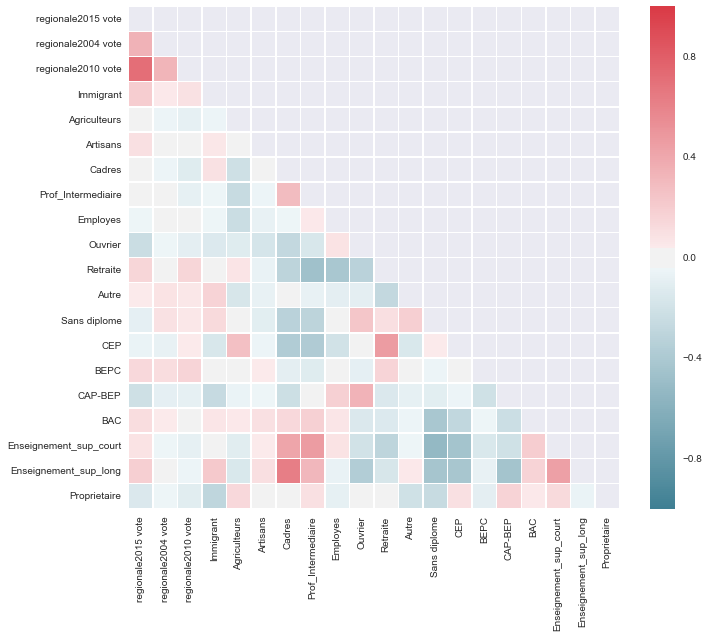

In [22]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap)
            #, vmax=.3,
            #square=True, xticklabels=5, yticklabels=5,
            #linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [23]:
#sns.pairplot(right[right.columns[2:]])

In [24]:
from sklearn import linear_model

In [25]:
lm = linear_model.LinearRegression()

In [26]:
#right_drop_na[right_drop_na.columns[3:]].values

In [27]:
#lm.fit(right_drop_na[right_drop_na.columns[3:]].values,right_drop_na['% Voix/Exp'].values)

In [28]:
#lm.predict(right_drop_na[right_drop_na.columns[3:]].values)

In [29]:
#np.mean((lm.predict(right_drop_na[right_drop_na.columns[3:]].values) - right_drop_na['% Voix/Exp'].values) ** 2)

In [30]:
#lm.score(right_drop_na[right_drop_na.columns[3:]].values,right_drop_na['% Voix/Exp'].values)

In [31]:
# Generate artificial data (2 regressors + constant)
nobs = 100
X = np.random.random((nobs, 2))
X = sm.add_constant(X)
beta = [1, .1, .5]
e = np.random.random(nobs)
y = np.dot(X, beta) + e

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     15.26
Date:                Fri, 18 Mar 2016   Prob (F-statistic):           1.72e-06
Time:                        08:21:57   Log-Likelihood:                -18.331
No. Observations:                 100   AIC:                             42.66
Df Residuals:                      97   BIC:                             50.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.4760      0.077     19.249      0.000         1.324     1.628
x1             0.1817      0.098      1.853      0.067        -0.013     0.376
x2             0.5254      0.107      4.890      0.000         0.312     0.739
==============================================================================
Omnibus:                       28.794   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.878
Skew:                          -0.282   Prob(JB):                       0.0321
Kurtosis:                       1.845   Cond. No.                         5.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
type(right[right.columns[1]].values)

numpy.ndarray

In [61]:
right.head()

,Code Insee,regionale2015 vote,regionale2004 vote,regionale2010 vote,Immigrant,Agriculteurs,Artisans,Cadres,Prof_Intermediaire,Employes,...,Retraite,Autre,Sans diplome,CEP,BEPC,CAP-BEP,BAC,Enseignement_sup_court,Enseignement_sup_long,Proprietaire
0,1001,32.19,3.21,32.81,4.173623,2.588997,0.647249,12.944984,14.239482,18.770227,...,27.022654,12.297735,14.000000,13.454545,5.818182,25.272727,16.909091,15.272727,9.454545,83.655084
1,1002,48.04,1.85,30.08,2.105263,0.000000,2.116402,10.582011,27.513228,4.232804,...,33.862434,4.232804,8.888889,6.666667,3.333333,22.222222,18.333333,21.111111,18.888889,83.404255
2,1004,36.53,5.95,41.11,12.048946,0.000000,2.818540,6.451324,15.595920,17.143880,...,25.590551,15.211167,17.637173,9.362333,5.783490,24.824518,19.110232,13.109244,10.173010,48.052800
3,1005,28.44,4.32,34.73,4.528012,0.000000,5.611068,8.147579,17.524981,18.139892,...,25.288240,10.607225,16.016949,12.033898,6.186441,29.491525,16.016949,11.610169,8.644068,79.415347
4,1006,25.00,1.35,34.00,8.000000,0.000000,0.000000,4.651163,18.604651,18.604651,...,40.697674,9.302326,15.555556,7.777778,8.888889,32.222222,22.222222,6.666667,7.777778,68.181818


In [76]:
right = right.dropna()

In [91]:
m = ols('Immigrant~Agriculteurs', data=right).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Immigrant   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     95.71
Date:                Fri, 18 Mar 2016   Prob (F-statistic):           1.42e-22
Time:                        08:56:50   Log-Likelihood:            -1.0945e+05
No. Observations:               36761   AIC:                         2.189e+05
Df Residuals:                   36759   BIC:                         2.189e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        4.7716      0.030    158.791      0.000         4.713     4.830
Agriculteurs    -0.0463      0.005     -9.783      0.000        -0.056    -0.037
==============================================================================
Omnibus:                    27208.198   Durbin-Watson:                   1.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           713268.294
Skew:                           3.314   Prob(JB):                         0.00
Kurtosis:                      23.536   Cond. No.                         7.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
lm_right = sm.OLS(right[right.columns[1]], right[right.columns[2:]]) 
lm_right = lm_right.fit()
lm_right.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     regionale2015 vote   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 2.895e+04
Date:                Fri, 18 Mar 2016   Prob (F-statistic):               0.00
Time:                        08:52:45   Log-Likelihood:            -1.3112e+05
No. Observations:               36761   AIC:                         2.623e+05
Df Residuals:                   36742   BIC:                         2.624e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
regionale2004 vote         0.2920      0.009     34.133      0.000         0.275     0.309
regionale2010 vote         0.6747      0.004    185.938      0.000         0.668     0.682
Immigrant                  0.2320      0.010     22.180      0.000         0.211     0.252
Agriculteurs               0.0453      0.054      0.832      0.405        -0.061     0.152
Artisans                   0.1067      0.055      1.931      0.053        -0.002     0.215
Cadres                    -0.1767      0.055     -3.193      0.001        -0.285    -0.068
Prof_Intermediaire        -0.0969      0.054     -1.780      0.075        -0.204     0.010
Employes                  -0.1140      0.054     -2.099      0.036        -0.220    -0.008
Ouvrier                   -0.1459      0.054     -2.688      0.007        -0.252    -0.040
Retraite                   0.0160      0.054      0.296      0.767        -0.090     0.122
Autre                     -0.0804      0.054     -1.476      0.140        -0.187     0.026
Sans diplome              -0.0300      0.054     -0.553      0.580        -0.137     0.077
CEP                        0.0425      0.055      0.780      0.435        -0.064     0.149
BEPC                       0.0959      0.057      1.687      0.092        -0.016     0.207
CAP-BEP                    0.0399      0.054      0.733      0.463        -0.067     0.146
BAC                        0.1894      0.055      3.454      0.001         0.082     0.297
Enseignement_sup_court     0.3480      0.055      6.283      0.000         0.239     0.457
Enseignement_sup_long      0.4742      0.055      8.592      0.000         0.366     0.582
Proprietaire              -0.0730      0.005    -15.714      0.000        -0.082    -0.064
==============================================================================
Omnibus:                     6028.484   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31001.557
Skew:                           0.701   Prob(JB):                         0.00
Kurtosis:                       7.275   Cond. No.                         502.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
lm_left = sm.OLS(left[left.columns[1]],left[left.columns[2:]]).fit()
lm_left.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     regionale2015 vote   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 2.971e+04
Date:                Fri, 18 Mar 2016   Prob (F-statistic):               0.00
Time:                        08:21:57   Log-Likelihood:            -1.2955e+05
No. Observations:               36761   AIC:                         2.591e+05
Df Residuals:                   36742   BIC:                         2.593e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
regionale2004 vote         0.5626      0.004    152.029      0.000         0.555     0.570
regionale2010 vote        -0.1724      0.015    -11.825      0.000        -0.201    -0.144
Immigrant                 -0.0875      0.010     -8.659      0.000        -0.107    -0.068
Agriculteurs               0.2007      0.052      3.839      0.000         0.098     0.303
Artisans                   0.1728      0.053      3.264      0.001         0.069     0.277
Cadres                     0.2838      0.053      5.350      0.000         0.180     0.388
Prof_Intermediaire         0.1666      0.052      3.194      0.001         0.064     0.269
Employes                   0.1113      0.052      2.139      0.032         0.009     0.213
Ouvrier                    0.1577      0.052      3.030      0.002         0.056     0.260
Retraite                   0.1514      0.052      2.928      0.003         0.050     0.253
Autre                      0.0790      0.052      1.515      0.130        -0.023     0.181
Sans diplome              -0.0046      0.052     -0.088      0.930        -0.107     0.097
CEP                        0.0685      0.052      1.311      0.190        -0.034     0.171
BEPC                      -0.0464      0.054     -0.853      0.393        -0.153     0.060
CAP-BEP                   -0.0446      0.052     -0.856      0.392        -0.147     0.058
BAC                       -0.0518      0.053     -0.987      0.324        -0.155     0.051
Enseignement_sup_court    -0.0233      0.053     -0.438      0.661        -0.127     0.081
Enseignement_sup_long      0.1215      0.053      2.299      0.022         0.018     0.225
Proprietaire              -0.0274      0.004     -6.152      0.000        -0.036    -0.019
==============================================================================
Omnibus:                     2259.295   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7939.156
Skew:                           0.241   Prob(JB):                         0.00
Kurtosis:                       5.225   Cond. No.                         495.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We compute the Variance Inflation Factor of every independent variable to detect multicolinearity

In [35]:
from statsmodels.stats import outliers_influence

In [36]:
index = 2
while index < len(left.columns):
    print '{0} : {1}'.format(left.columns[index], 
                             outliers_influence.variance_inflation_factor(left[left.columns[2:]].values,index-2)) 
    index += 1

regionale2004 vote : 11.0405977192
regionale2010 vote : 2.58881814332
Immigrant : 2.44378230453
Agriculteurs : 60.1980219099
Artisans : 45.0232031463
Cadres : 80.9927769741
Prof_Intermediaire : 310.861244485
Employes : 404.506870941
Ouvrier : 435.795012842
Retraite : 1504.19574643
Autre : 273.66120692
Sans diplome : 445.774459902
CEP : 276.04556953
BEPC : 67.1944027922
CAP-BEP : 1190.46639982
BAC : 453.687224933
Enseignement_sup_court : 253.19609115
Enseignement_sup_long : 150.099941341
Proprietaire : 69.1961005269


### Linear Regression

In [37]:
from sklearn import cross_validation, metrics

In [38]:
def modelfit(alg, dtrain, predictors, target):
    alg.fit(dtrain[predictors], dtrain[target])
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='mean_squared_error') 
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print "\nModel Report"
    print "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    print "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
    print "R-squared: ", alg.score(dtrain[predictors], dtrain[target])
    

In [39]:
right.columns

Index([u'Code Insee', u'regionale2015 vote', u'regionale2004 vote',
       u'regionale2010 vote', u'Immigrant', u'Agriculteurs', u'Artisans',
       u'Cadres', u'Prof_Intermediaire', u'Employes', u'Ouvrier', u'Retraite',
       u'Autre', u'Sans diplome', u'CEP', u'BEPC', u'CAP-BEP', u'BAC',
       u'Enseignement_sup_court', u'Enseignement_sup_long', u'Proprietaire'],
      dtype='object')


Model Report
RMSE : 8.804
CV Score : Mean - 8.85 | Std - 1.387 | Min - 6.712 | Max - 11.81
R-squared:  0.589978910825


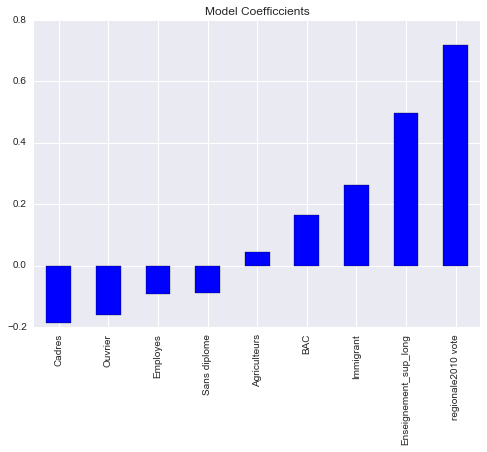

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
target = right.columns[1]
predictors = ['regionale2010 vote', 'Immigrant', 'Agriculteurs', 'Cadres', 'Ouvrier','Employes','Sans diplome','BAC',
              'Enseignement_sup_long']
predictors_full = right.columns[2:]
lm = LinearRegression(normalize=True)
modelfit(lm, right, predictors, target)
coef1 = pd.Series(lm.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficcients')

In [41]:
index = 0
while index < len(predictors):
    print '{0} : {1}'.format(predictors[index], 
                             outliers_influence.variance_inflation_factor(right[predictors].values,index)) 
    index += 1

regionale2010 vote : 8.94509722642
Immigrant : 2.24145426492
Agriculteurs : 1.6132176053
Cadres : 4.07974407746
Ouvrier : 6.0471112676
Employes : 7.86255700073
Sans diplome : 7.2739417344
BAC : 15.0438284917
Enseignement_sup_long : 6.71945709793



Model Report
RMSE : 8.567
CV Score : Mean - 8.651 | Std - 1.371 | Min - 6.711 | Max - 11.89
R-squared:  0.611760689249


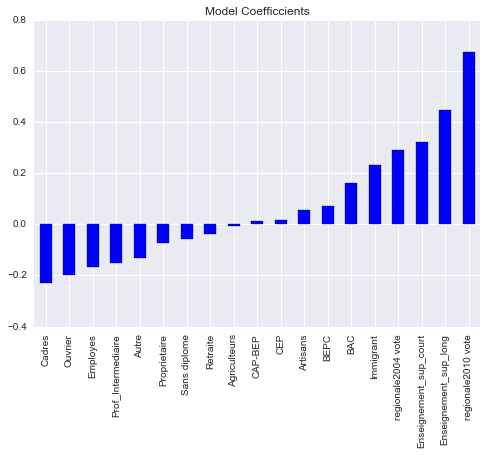

In [42]:
lm = LinearRegression(normalize=True)
modelfit(lm, right, predictors_full, target)
coef1 = pd.Series(lm.coef_, predictors_full).sort_values()
coef1.plot(kind='bar', title='Model Coefficcients')

### Baseline result

In [43]:
base_result = right[right.columns[1]].copy()

In [44]:
base_result[:] = base_result.mean(axis=0)

In [45]:
print "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(right[right.columns[1]].values, base_result))

RMSE : 13.75


### Ridge regression


Model Report
RMSE : 8.568
CV Score : Mean - 8.649 | Std - 1.374 | Min - 6.71 | Max - 11.88
R-squared:  0.611677783926


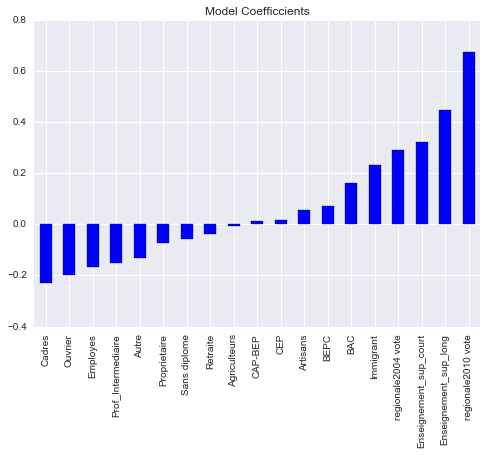

In [46]:
ridge_regression = Ridge(alpha = 0.01, normalize=True)
modelfit(ridge_regression, right, predictors_full, target)
coef1 = pd.Series(lm.coef_, predictors_full).sort_values()
coef1.plot(kind='bar', title='Model Coefficcients')


Model Report
RMSE : 8.567
CV Score : Mean - 8.651 | Std - 1.371 | Min - 6.711 | Max - 11.89
R-squared:  0.611760689247


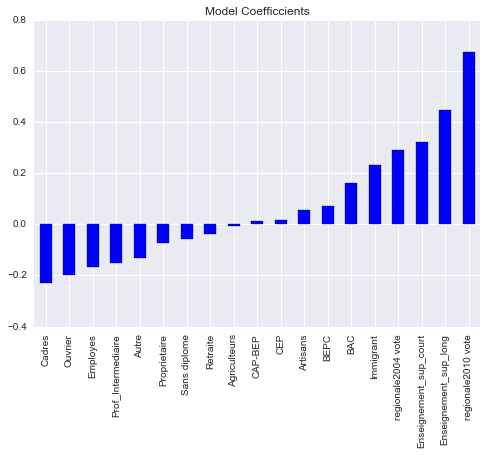

In [47]:
ridge_regression = Ridge(alpha = 0.31623, normalize=False)
modelfit(ridge_regression, right, predictors_full, target)
coef1 = pd.Series(lm.coef_, predictors_full).sort_values()
coef1.plot(kind='bar', title='Model Coefficcients')

### Lasso


Model Report
RMSE : 10.58
CV Score : Mean - 10.59 | Std - 1.48 | Min - 8.427 | Max - 13.73
R-squared:  0.0615756376513


//anaconda/lib/python2.7/site-packages/sklearn/linear_model/base.py:400: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if precompute == 'auto':


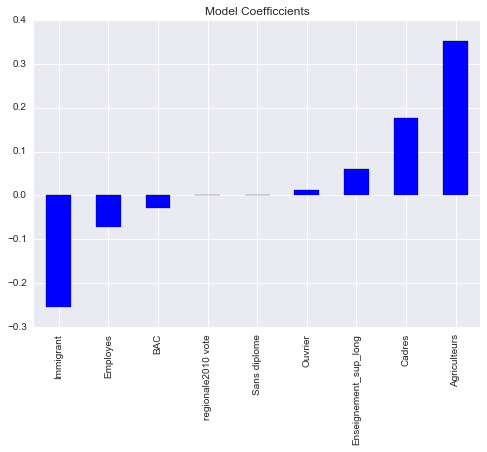

In [48]:
lasso_regression = Lasso(alpha = .001, normalize=True)
modelfit(lasso_regression, left, predictors, target)
coef1 = pd.Series(lasso_regression.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficcients')


Model Report
RMSE : 8.232
CV Score : Mean - 8.257 | Std - 1.154 | Min - 6.422 | Max - 10.34
R-squared:  0.431630113639


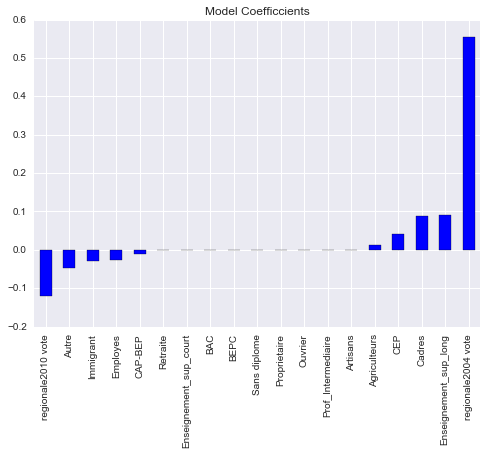

In [49]:
lasso_regression = Lasso(alpha = .001, normalize=True)
modelfit(lasso_regression, left, predictors_full, target)
coef1 = pd.Series(lasso_regression.coef_, predictors_full).sort_values()
coef1.plot(kind='bar', title='Model Coefficcients')


Model Report
RMSE : 7.471
CV Score : Mean - 7.564 | Std - 0.8662 | Min - 6.128 | Max - 9.255
R-squared:  0.594311384757


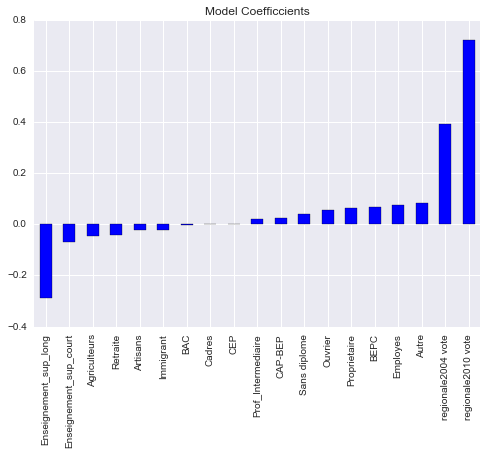

In [50]:
lasso_regression = Lasso(alpha = .07, normalize=False)
modelfit(lasso_regression, er, predictors_full, target)
coef1 = pd.Series(lasso_regression.coef_, predictors_full).sort_values()
coef1.plot(kind='bar', title='Model Coefficcients')

In [51]:
### lasso cross validation
scores = []
scores_std = []

lasso = linear_model.Lasso()
alphas = np.logspace(-4, -.5, 100)
for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_validation.cross_val_score(lasso, right[predictors_full], right[target], n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

//anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:490: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [52]:
X = right[predictors_full].values
y = right[target].values

lasso_cv = linear_model.LassoCV(alphas=alphas)
k_fold = cross_validation.KFold(len(X), 10) # create indices for 10-fold cross-validation 


for k, (train, test) in enumerate(k_fold):
    #print train, test
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))

[fold 0] alpha: 0.06734, score: 0.56795
[fold 1] alpha: 0.07925, score: 0.73680
[fold 2] alpha: 0.06208, score: 0.52184
[fold 3] alpha: 0.07305, score: 0.51869
[fold 4] alpha: 0.11906, score: 0.57201
[fold 5] alpha: 0.12915, score: 0.47015
[fold 6] alpha: 0.11906, score: 0.14398
[fold 7] alpha: 0.00260, score: 0.51034
[fold 8] alpha: 0.07305, score: 0.32865
[fold 9] alpha: 0.01434, score: 0.48582


In [53]:
X = right[predictors_full].values
y = right[target].values

ridge_cv = linear_model.RidgeCV(alphas=alphas)
k_fold = cross_validation.KFold(len(X), 10) # create indices for 10-fold cross-validation 


for k, (train, test) in enumerate(k_fold):
    #print train, test
    ridge_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, ridge_cv.alpha_, ridge_cv.score(X[test], y[test])))

[fold 0] alpha: 0.31623, score: 0.56862
[fold 1] alpha: 0.31623, score: 0.73650
[fold 2] alpha: 0.31623, score: 0.52259
[fold 3] alpha: 0.31623, score: 0.51893
[fold 4] alpha: 0.31623, score: 0.57169
[fold 5] alpha: 0.31623, score: 0.46931
[fold 6] alpha: 0.31623, score: 0.14448
[fold 7] alpha: 0.31623, score: 0.50997
[fold 8] alpha: 0.31623, score: 0.32956
[fold 9] alpha: 0.31623, score: 0.48527


#### The cross-validation results are not stable, we need to think more about it. Is it because of multicolinearity ?

In [54]:
X = right[predictors].values #testing with refined predictors
y = right[target].values

lasso_cv = linear_model.LassoCV(alphas=alphas)
k_fold = cross_validation.KFold(len(X), 10) # create indices for 10-fold cross-validation 


for k, (train, test) in enumerate(k_fold):
    #print train, test
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))

[fold 0] alpha: 0.00010, score: 0.53501
[fold 1] alpha: 0.00010, score: 0.69172
[fold 2] alpha: 0.00010, score: 0.50149
[fold 3] alpha: 0.00010, score: 0.51210
[fold 4] alpha: 0.00010, score: 0.57254
[fold 5] alpha: 0.00010, score: 0.44928
[fold 6] alpha: 0.00010, score: 0.12042
[fold 7] alpha: 0.00010, score: 0.51223
[fold 8] alpha: 0.00010, score: 0.26040
[fold 9] alpha: 0.00010, score: 0.48345


## Elastic Net Reegression

In [55]:
from sklearn.linear_model import ElasticNet


Model Report
RMSE : 8.567
CV Score : Mean - 8.65 | Std - 1.369 | Min - 6.713 | Max - 11.88
R-squared:  0.611754986536


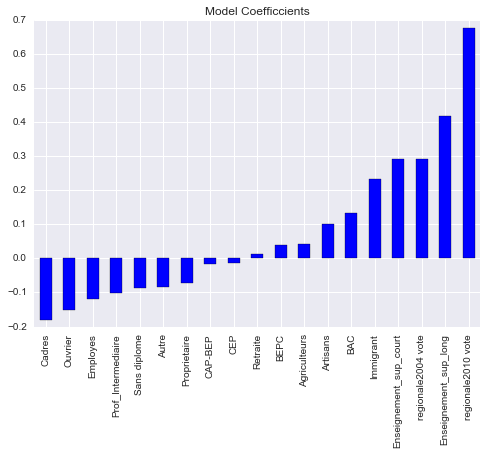

In [56]:
elastic_regression = ElasticNet(alpha = .01 , normalize=False)
modelfit(elastic_regression, right, predictors_full, target)
coef1 = pd.Series(elastic_regression.coef_, predictors_full).sort_values()
coef1.plot(kind='bar', title='Model Coefficcients')

### Decision tree regression

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
decision_tree_regression = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [59]:
modelfit(decision_tree_regression, df, predictors, target)
coef1 = pd.Series(decision_tree_regression.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficcients')

NameError: name 'df' is not defined